In [1]:
import matplotlib.pyplot as plt
plt.rc('font', size=12)
import pandas as pd
import seaborn as sns
import warnings 

import Coverage as cov

warnings.filterwarnings('ignore')
%matplotlib inline

%load_ext autoreload
%autoreload 2

## Params

In [11]:
#get list of client rules sorted by count
popSize = 10
clientFilename = "../Data/ICU/Best/"
# clientFilename = "../Data/ICU/Test/"
# clientFilename = "../Data/Sepsis/Best/"

# ldpFilename = "../Results/TEST/ICU_Base_PRIV.csv"
ldpFilename = "../Results/TEST/ICU_Base_TEST.csv"
# ldpFilename = "../Results/Sepsis_Base_TEST.csv"

# ldpFilename = "../Results/ICU_Base_TEST_2.csv"
# ldpFilename = "../Results/ICU_Ruleset_MCTS_TEST.csv"
# ldpFilename = "../Results/ICU_TEST_2.csv"
# ldpFilename = "../Results/Sepsis_Ruleset_MCTS_Test.csv"

graphName = '../Results/Graphs/test' #Name of count coverage graphs
popThresh = 0.01 #Percentage match count


## Load Client Rules

In [12]:
# Load Client Rule Trees and Text Rule Structures, and get dataframe of rules and their counts
clientTrees, clientRules, clientDF = cov.loadClientRules(popSize, clientFilename)
clientDF

File not found for Client 8


,Rule,Rule Count,Percent of Population
53,"((MET >= 0.000) U[0,0] (death = 0.000))",17,1.0
56,"F[0,0]((BLOOD_UREA_NITROGEN <= 0.000 & CREATIN...",13,1.0
57,"G[0,0]((n_evts <= 0.000 -> LOS >= 0.000))",12,1.0
47,"G[0,0]((hr >= 0.000 & Pulse >= 0.000))",3,0.3
172,"((af >= 0.000) U[0,0] (direct >= 0.000))",3,0.3
...,...,...,...
188,"F[0,0]((HEMOGLOBIN <= 0.000 & O2_Flow <= 0.000))",1,0.1
187,"F[0,0]((dfa >= 0.000 & Mort >= 0.000))",1,0.1
186,"((O2_Flow <= 0.000) U[0,0] (PLATELET_COUNT >= ...",1,0.1
185,"((MET >= 0.000) U[0,0] (PARTIAL_THROMBOPLASTIN...",1,0.1


In [13]:
clientDF.to_csv("Client Rules.csv")

## Load LDP Ruleset

In [14]:
ldpDF, ldpTrees, ldpRules = cov.loadLDPRuleset(ldpFilename)
ldpDF

,Rule,Percent Count
181,"((s24_hr > 0.000) U[0,0] (POTASSIUM < 0.000))",1.0
149,"G[0,0]((BLOOD_UREA_NITROGEN = 0.000 | ICU_Pt_D...",1.0
139,"((death = 0.000) U[0,0] (n_edrk < 0.000))",1.0
527,"F[0,0]((direct > 0.000 & death = 0.000))",1.0
526,"((MAGNESIUM > 0.000) U[0,0] (death > 0.000))",1.0
...,...,...
233,"G[0,0]((Resp = 0.000 | Mort = 0.000))",0.5
232,"((lds > 0.000) U[0,0] (n_edrk > 0.000))",0.5
231,"((af = 0.000) U[0,0] (dfa = 0.000))",0.5
230,"F[0,0]((ICU_Pt_Days > 0.000 & Mort = 0.000))",0.5


## Get Table of Structure Counts - Count of rules above threshold

In [15]:
covDF, countDF, clientTrees = cov.getCoverageTable(popThresh, ldpDF, ldpTrees, clientDF)
countDF.to_csv(ldpFilename + "_CovCountDF.csv")

LDP RULE NOT FOUND G[0,0]((ICU_Pt_Days = 0.000 & n_evts < 0.000))
LDP RULE NOT FOUND ((s8_edrk = 0.000) U[0,0] (s24_hr < 0.000))
LDP RULE NOT FOUND F[0,0]((death < 0.000 & ALBUMIN < 0.000))
LDP RULE NOT FOUND F[0,0]((n_evts = 0.000 & MAGNESIUM = 0.000))
LDP RULE NOT FOUND ((Glasgow_Coma_Scale_Total < 0.000) U[0,0] (lds > 0.000))
LDP RULE NOT FOUND ((CHLORIDE = 0.000) U[0,0] (Pulse = 0.000))
LDP RULE NOT FOUND ((s2_edrk = 0.000) U[0,0] (PLATELET_COUNT = 0.000))
LDP RULE NOT FOUND G[0,0]((s24_edrk > 0.000 | edrk > 0.000))
LDP RULE NOT FOUND ((SBP > 0.000) U[0,0] (CREATININE = 0.000))
LDP RULE NOT FOUND ((direct > 0.000) U[0,0] (death > 0.000))
LDP RULE NOT FOUND F[0,0]((CHLORIDE < 0.000 & s8_hr < 0.000))
LDP RULE NOT FOUND G[0,0]((PHOSPHORUS = 0.000 -> Temp < 0.000))
LDP RULE NOT FOUND G[0,0]((LOS > 0.000 -> WHITE_BLOOD_CELL_COUNT > 0.000))
LDP RULE NOT FOUND F[0,0]((LOS = 0.000 & PHOSPHORUS > 0.000))
LDP RULE NOT FOUND F[0,0]((O2_Flow = 0.000 & BLOOD_UREA_NITROGEN < 0.000))
LDP RULE NOT

LDP RULE NOT FOUND F[0,0]((GLUCOSE = 0.000 & Temp > 0.000))
LDP RULE NOT FOUND ((POTASSIUM > 0.000) U[0,0] (lds = 0.000))
LDP RULE NOT FOUND ((n_evts < 0.000) U[0,0] (death > 0.000))
LDP RULE NOT FOUND ((MET > 0.000) U[0,0] (Resp = 0.000))
LDP RULE NOT FOUND ((dfa < 0.000) U[0,0] (direct = 0.000))
LDP RULE NOT FOUND F[0,0]((ICU_Pt_Days > 0.000 & Temp < 0.000))
LDP RULE NOT FOUND G[0,0]((BLOOD_UREA_NITROGEN > 0.000 -> WHITE_BLOOD_CELL_COUNT > 0.000))
LDP RULE NOT FOUND F[0,0]((ICU_Pt_Days > 0.000 & PHOSPHORUS > 0.000))
LDP RULE NOT FOUND ((direct < 0.000) U[0,0] (s24_hr = 0.000))
LDP RULE NOT FOUND ((Pulse < 0.000) U[0,0] (s24_hr = 0.000))
LDP RULE NOT FOUND G[0,0]((Glasgow_Coma_Scale_Total > 0.000 & Sgy > 0.000))
LDP RULE NOT FOUND ((CREATININE = 0.000) U[0,0] (PARTIAL_THROMBOPLASTIN_TIME < 0.000))
LDP RULE NOT FOUND F[0,0]((LOS > 0.000 & ICU_Pt_Days < 0.000))
LDP RULE NOT FOUND F[0,0]((Mort = 0.000 & CREATININE = 0.000))
LDP RULE NOT FOUND ((CREATININE = 0.000) U[0,0] (n_edrk = 0.000)

LDP RULE NOT FOUND ((n_evts = 0.000) U[0,0] (s2_hr = 0.000))
LDP RULE NOT FOUND G[0,0]((hr < 0.000 | n_evts < 0.000))
LDP RULE NOT FOUND ((MAGNESIUM > 0.000) U[0,0] (ICU_Pt_Days = 0.000))
LDP RULE NOT FOUND F[0,0]((PCO2 = 0.000 & Temp > 0.000))
LDP RULE NOT FOUND ((SBP = 0.000) U[0,0] (s2_hr = 0.000))
LDP RULE NOT FOUND ((ALT_GPT > 0.000) U[0,0] (Resp > 0.000))
LDP RULE NOT FOUND ((n_evts = 0.000) U[0,0] (ICU_Pt_Days = 0.000))
LDP RULE NOT FOUND ((n_edrk < 0.000) U[0,0] (lds > 0.000))
LDP RULE NOT FOUND G[0,0]((LOS = 0.000 -> edrk = 0.000))
LDP RULE NOT FOUND ((dfa < 0.000) U[0,0] (LOS > 0.000))
LDP RULE NOT FOUND ((ICU_Pt_Days > 0.000) U[0,0] (BLOOD_UREA_NITROGEN = 0.000))
LDP RULE NOT FOUND ((Mort > 0.000) U[0,0] (s24_hr < 0.000))
LDP RULE NOT FOUND ((SBP < 0.000) U[0,0] (Resp = 0.000))
LDP RULE NOT FOUND G[0,0]((hr < 0.000 -> WHITE_BLOOD_CELL_COUNT > 0.000))
LDP RULE NOT FOUND ((ALKALINE_PHOSPHATASE > 0.000) U[0,0] (PARTIAL_THROMBOPLASTIN_TIME = 0.000))
LDP RULE NOT FOUND G[0,0]((s8

LDP RULE NOT FOUND ((CREATININE > 0.000) U[0,0] (PLATELET_COUNT = 0.000))
LDP RULE NOT FOUND ((tte > 0.000) U[0,0] (tte < 0.000))
LDP RULE NOT FOUND F[0,0]((PARTIAL_THROMBOPLASTIN_TIME > 0.000 & TROPONIN_I < 0.000))
LDP RULE NOT FOUND ((LOS > 0.000) U[0,0] (Sgy = 0.000))
LDP RULE NOT FOUND ((PROTIME_INR = 0.000) U[0,0] (n_edrk = 0.000))
LDP RULE NOT FOUND G[0,0]((s24_edrk > 0.000 | GLUCOSE < 0.000))
LDP RULE NOT FOUND ((CALCIUM > 0.000) U[0,0] (cosen > 0.000))
LDP RULE NOT FOUND F[0,0]((y = 0.000 -> CHLORIDE > 0.000))
LDP RULE NOT FOUND ((ALKALINE_PHOSPHATASE > 0.000) U[0,0] (CHLORIDE = 0.000))
LDP RULE NOT FOUND F[0,0]((O2_Flow < 0.000 & cosen > 0.000))
LDP RULE NOT FOUND ((s2_edrk = 0.000) U[0,0] (s2_hr = 0.000))
LDP RULE NOT FOUND ((lds < 0.000) U[0,0] (OXYGEN_SATURATION = 0.000))
LDP RULE NOT FOUND F[0,0]((ICU_Pt_Days > 0.000 & TOTAL_BILIRUBIN > 0.000))
LDP RULE NOT FOUND G[0,0]((tte < 0.000 -> WHITE_BLOOD_CELL_COUNT = 0.000))
LDP RULE NOT FOUND ((Temp = 0.000) U[0,0] (WHITE_BLOOD_

In [16]:
covDF

,Total Client Rules,Found Rules,Non Rules,Precision
0,553,94,512,0.155116


In [17]:
countDF

,LDP Rule,Client Rule,LDP Count,Client Count
0,"((O2_Flow < 0.000) U[0,0] (n_edrk = 0.000))","((n_edrk <= 0.000) U[0,0] (O2_Flow <= 0.000))",0.5,0.1
1,"((n_edrk = 0.000) U[0,0] (Mort > 0.000))","((Mort >= 0.000) U[0,0] (n_edrk <= 0.000))",0.5,0.1
2,"((y = 0.000) U[0,0] (ALBUMIN = 0.000))","((ALBUMIN >= 0.000) U[0,0] (y = 0.000))",0.5,0.1
3,"G[0,0]((s8_edrk > 0.000 -> Temp = 0.000))","G[0,0]((s8_edrk >= 0.000 -> Temp >= 0.000))",0.5,0.1
4,"F[0,0]((LOS = 0.000 & s8_edrk = 0.000))","F[0,0]((LOS >= 0.000 & s8_edrk >= 0.000))",0.5,0.1
...,...,...,...,...
89,"((O2_Flow = 0.000) U[0,0] (n_evts = 0.000))","((n_evts <= 0.000) U[0,0] (O2_Flow >= 0.000))",1.0,0.1
90,"((death = 0.000) U[0,0] (LOS > 0.000))","((death >= 0.000) U[0,0] (LOS >= 0.000))",0.5,0.1
91,"((n_evts > 0.000) U[0,0] (lds = 0.000))","((lds <= 0.000) U[0,0] (n_evts >= 0.000))",0.5,0.1
92,"((y = 0.000) U[0,0] (Pulse = 0.000))","((Pulse <= 0.000) U[0,0] (y = 0.000))",0.5,0.1


## Get number of unique structure types

In [18]:
structDF = cov.countUniqueStructuresNoVars(clientTrees, ldpTrees)

CLIENT STRUCT NOT FOUND F[0,0]((x >= 0.000 | x <= 0.000))
CLIENT STRUCT NOT FOUND F[0,0]((x < 0.000 -> x = 0.000))
CLIENT STRUCT NOT FOUND F[0,0]((x >= 0.000 | x >= 0.000))
CLIENT STRUCT NOT FOUND F[0,0]((x <= 0.000 | x >= 0.000))
CLIENT STRUCT NOT FOUND F[0,0](((x <= 0.000 | x <= 0.000) & x >= 0.000))
LDP STRUCT NOT FOUND F[0,0]((x != 0.000 & x = 0.000))


In [19]:
structDF

,Total Client Structures,Found Structures,Non Structures,Precision
0,43,38,1,0.974359


## Compare LDP Rules Found vs the Percent Client Counts 

[autoreload of Coverage failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/local/Cellar/python@3.8/3.8.3_1/Frameworks/Python.framework/Versions/3.8/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/usr/local/Cellar/python@3.8/3.8.3_1/Frameworks/Python.framework/Versions/3.8/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 779, in exec_module
  File "<frozen importlib._bootstrap_external>", line 916, in get_code
  File "<frozen importlib._bootstrap_external>", line 846, in source_to_code
  File "<frozen importlib._

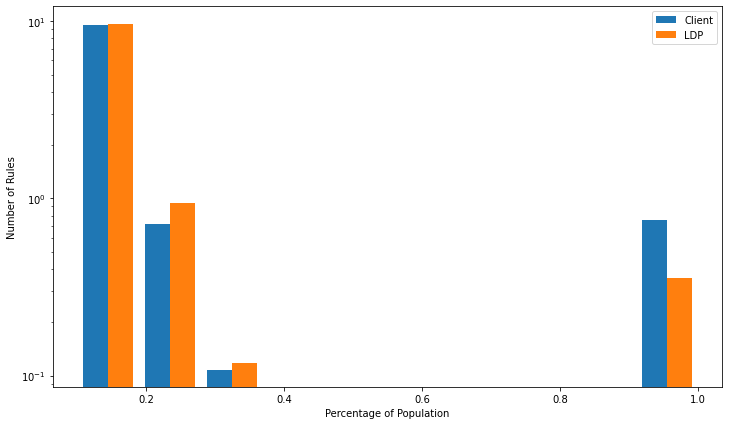

In [20]:
#make list of rule counts x population percents

lst = []
for idx, row in clientDF.iterrows():
    lst.extend([row['Percent of Population'] for i in range(row['Rule Count'])])
    
n_bins = 10

plt.figure(figsize=(12, 7))
plt.hist([lst, countDF['Client Count'].values], n_bins, density=True, histtype='bar',label=['Client', 'LDP'])
plt.xlabel("Percentage of Population")
plt.ylabel("Number of Rules")
plt.yscale('log')
plt.legend()


In [ ]:
lst2 = [
1.0,
 1.0,
 1.0,

 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
    0.9, 0.9, 0.9, 0.9, 0.9,
 0.3,
 0.3,

 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,


 0.1,
 0.1,
 0.1,
 0.1,
 0.1]



In [ ]:
lst = []
for idx, row in clientDF.iterrows():
    lst.extend([row['Percent of Population'] for i in range(row['Rule Count'])])
    
n_bins = 10

plt.figure(figsize=(12, 7))
plt.title('Sepsis Coverage Eps 1000, Queries 5000')
plt.hist([lst, lst2], n_bins,  histtype='bar',label=['Client', 'LDP'])
plt.xlabel("Percentage of Population")
plt.ylabel("Number of Rules")
plt.yscale('log')
plt.legend()

In [ ]:
#queries 3000 icu
#queries 5000 sepsis

rules = [0, 1, 5, 50, 70, 100, 180, 200, 300, 330, 355, 360, 400, 420, 460, 500, 553]
queries = [1, 200, 1300, 1600, 1800, 2000, 2300, 2600, 2800, 3000, 3300, 3600, 3800, 4000, 4300, 4600, 4890]


rulesCov = [0, 1, 5, 50, 70, 100, 180, 200, 260, 315, 335, 360, 390, 420, 460, 500, 553]
queriesCov = [1, 63, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000]


plt.figure(figsize=(12, 7))
plt.title("ICU Query Analysis")
plt.axhline(y=553, color='r', linestyle='-', label='Total Client Rules')
plt.plot(queries, rules, label='Baseline')
plt.plot(queriesCov, rulesCov, label='Coverage')
plt.xlabel("Number of Queries")
plt.ylabel("Number of Rules")
plt.legend()

In [ ]:
rules = [0, 1, 5, 50, 70, 100, 180, 200, 300, 330, 355, 360, 400, 420, 460, 500, 999]
queries = [1, 200, 1300, 1600, 1800, 2000, 2300, 2600, 2800, 3000, 3300, 3600, 3800, 4000, 4300, 4600, 4890]

rules = [0, 0, 1, 5, 50, 80, 100, 120, 200, 220, 250, 260, 300, 340, 380, 402, 430, 460, 
              490, 510, 550, 600, 700, 800, 900, 950, 999]
queries = [1, 50, 100, 300, 600, 1000, 1300, 1600, 2000, 2300, 2600, 3000, 3300, 3600, 4000, 4300, 4600, 5000, 
              5300, 5600, 6000, 6300, 6600, 7000, 7300, 7600, 8002]



rulesCov = [0, 1, 5, 50, 70, 80, 100, 120, 155, 180, 200, 230, 250, 300, 360, 400, 500, 540, 
              600, 650, 660, 700, 730, 840, 900, 980, 999]
queriesCov = [1, 63, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000, 3200, 
              3400, 3600, 3800, 4000, 4200, 4400, 4600, 4800, 5002]



plt.figure(figsize=(12, 7))
plt.title("Sepsis Query Analysis")
plt.axhline(y=999, color='r', linestyle='-', label='Total Client Rules')
plt.plot(queries, rules, label='Baseline')
plt.plot(queriesCov, rulesCov, label='Coverage')
plt.xlabel("Number of Queries")
plt.ylabel("Number of Rules")
plt.legend()

In [ ]:
rules = [0, 1, 5, 50, 70, 100, 180, 200, 300, 330, 355, 360, 400, 420, 460, 500, 999]
queries = [1, 200, 1300, 1600, 1800, 2000, 2300, 2600, 2800, 3000, 3300, 3600, 3800, 4000, 4300, 4600, 4890]

rules = [0, 0, 1, 5, 50, 80, 100, 120, 200, 220, 250, 260, 300, 340, 380, 402, 430, 460, 
              490, 510, 550, 600, 700, 800, 900, 950, 999]
queries = [1, 50, 100, 300, 600, 1000, 1300, 1600, 2000, 2300, 2600, 3000, 3300, 3600, 4000, 4300, 4600, 5000, 
              5300, 5600, 6000, 6300, 6600, 7000, 7300, 7600, 8002]



rulesCov = [0, 1, 5, 50, 70, 80, 100, 120, 155, 180, 200, 230, 250, 300, 360, 400, 500, 540, 
              600, 650, 660, 700, 730, 840, 900, 980, 999]
queriesCov = [1, 63, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000, 3200, 
              3400, 3600, 3800, 4000, 4200, 4400, 4600, 4800, 5002]



plt.figure(figsize=(12, 7))
plt.title("Sepsis Query Analysis")
plt.axhline(y=999, color='r', linestyle='-', label='Total Client Rules')
plt.plot(queries, rules, label='Baseline')
plt.plot(queriesCov, rulesCov, label='Coverage')
plt.xlabel("Number of Queries")
plt.ylabel("Number of Rules")
plt.legend()

## Complexity Analysis

In [40]:
k = 4 #k-ary tree
h = 17 #height
k**h

17179869184